In [66]:
# Package import
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage import io
from skimage.measure import regionprops
from skimage import data
from skimage.exposure import histogram
from skimage.color import label2rgb
from scipy import ndimage as ndi
from scipy.signal import medfilt2d
from skimage.filters import gaussian
import pandas as pd


# Plot parameter setting 
plt.style.use('default')
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['figure.dpi'] = 100

In [184]:
# Access Manually Identified Bowties
# os.chdir("..")
os.chdir("./Manually Identified Bowties/") 

l0bowtie = [k for k in os.listdir() if '_0.npy' in k] # create a list with all 0 degree images from manually identified bowties
l45bowtie = [k for k in os.listdir() if '_45.npy' in k] # create a list with all 45 degree images from manually identified bowties

# Access Manually Identified Other
os.chdir("..")
os.chdir("./Manually Identified Other/") 

l0other = [k for k in os.listdir() if '_0.npy' in k] # create a list with all 0 degree images from manually identified other
l45other = [k for k in os.listdir() if '_45.npy' in k] # create a list with all 45 degree images from manually identified other

In [ ]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    # From 0 up to img size (if img size = 224, then up to 223)
    for i in range(img_size):
        # Add the kernel size (let's say 3) to the current i
        added = i + kernel_size
        # It must be lower than the image size
        if added <= img_size:
            # Increment if so
            num_pixels += 1
            
    return num_pixels

In [ ]:
def convolve(img: np.array, kernel: np.array) -> np.array:
    try:
        # Assuming a rectangular image
        tgt_size = calculate_target_size(
            img_size=img.shape[0],
            kernel_size=kernel.shape[0]
        )
        # To simplify things
        k = kernel.shape[0]
        
        # 2D array of zeros
        convolved_img = np.zeros(shape=(tgt_size, tgt_size))
        
        # Iterate over the rows
        for i in range(tgt_size):
            # Iterate over the columns
            for j in range(tgt_size):
                # img[i, j] = individual pixel value
                # Get the current matrix
                mat = img[i:i+k, j:j+k]
                
                # Apply the convolution - element-wise multiplication and summation of the result
                # Store the result to i-th row and j-th column of our convolved_img array
                convolved_img[i, j] = np.sum(np.multiply(mat, kernel))

    except ValueError:  # raised if file is empty.
        pass
            
    return convolved_img

In [126]:
customKernel = np.array([[ -1, -1, -1], [-1, 11, -1], [-1, -1, -1]])

os.chdir("..")
os.chdir("./Manually Identified Bowties/") 

var = 38 # if convolved image, change to 38 (otherwise, leave at 40)

l0b = np.empty([int(len(l0bowtie)), var*var])

for i in range(0, len(l0bowtie)):
    newArray = np.load(l0bowtie[i])
    newArray = convolve(img=newArray, kernel=customKernel) # apply the image filter (comment out to omit filtering)

    if newArray.shape == (var, var):
        l0b[i] = np.reshape(newArray, (1, var*var)) # flatten image into 1 x len(image)*height(image)

    else:
        print(newArray.shape)
        print("hey this isn't working!!!")

l45b = np.empty([int(len(l45bowtie)), var*var])

for i in range(0, len(l45bowtie)):
    newArray = np.load(l45bowtie[i])
    newArray = convolve(img=newArray, kernel=customKernel) # apply the image filter (comment out to omit filtering)

    if newArray.shape == (var, var):
        l45b[i] = np.reshape(newArray, (1, var*var)) # flatten image into 1 x len(image)*height(image)

os.chdir("..")
os.chdir("./Manually Identified Other/") 

l0o = np.empty([int(len(l0other)), var*var])

for i in range(0, len(l0other)):
    newArray = np.load(l0other[i])
    newArray = convolve(img=newArray, kernel=customKernel) # apply the image filter (comment out to omit filtering)

    if newArray.shape == (var, var):
        l0o[i] = np.reshape(newArray, (1, var*var)) # flatten image into 1 x len(image)*height(image)

l45o = np.empty([int(len(l45other)), var*var])

for i in range(0, len(l45other)):
    newArray = np.load(l45other[i])
    newArray = convolve(img=newArray, kernel=customKernel) # apply the image filter (comment out to omit filtering)

    if newArray.shape == (var, var):
        l45o[i] = np.reshape(newArray, (1, var*var)) # flatten image into 1 x len(image)*height(image)

(27, 27)
hey this isn't working!!!
(34, 34)
hey this isn't working!!!
(36, 36)
hey this isn't working!!!
(36, 36)
hey this isn't working!!!
(33, 33)
hey this isn't working!!!
(22, 22)
hey this isn't working!!!
(34, 34)
hey this isn't working!!!
(0, 0)
hey this isn't working!!!
(35, 35)
hey this isn't working!!!
(0, 0)
hey this isn't working!!!
(0, 0)
hey this isn't working!!!
(29, 29)
hey this isn't working!!!
(0, 0)
hey this isn't working!!!
(0, 0)
hey this isn't working!!!
(37, 37)
hey this isn't working!!!
(35, 35)
hey this isn't working!!!
(0, 0)
hey this isn't working!!!
(0, 0)
hey this isn't working!!!
(24, 24)
hey this isn't working!!!
(22, 22)
hey this isn't working!!!
(0, 0)
hey this isn't working!!!
(0, 0)
hey this isn't working!!!
(35, 35)
hey this isn't working!!!
(36, 36)
hey this isn't working!!!
(32, 32)
hey this isn't working!!!
(0, 0)
hey this isn't working!!!
(0, 0)
hey this isn't working!!!


In [150]:
lst1 = []
lst2 = []
lst3 = []
lst4 = []

for i in range(0, len(l0b)):
    something = np.append(l0b[i], 1) # for bowtie data, append 1 to the end of the array
    lst1.append(something)

for i in range(0, len(l45b)):
    something = np.append(l45b[i], 1) # for bowtie data, append 1 to the end of the array
    lst2.append(something)

for i in range(0, len(l0o)):
    something = np.append(l0o[i], 0) # for other data, append 0 to the end of the array
    lst3.append(something)

for i in range(0, len(l45o)):
    something = np.append(l45o[i], 0) # for other data, append 0 to the end of the array
    lst4.append(something)

# convert numpy arrays to pandas dataframes
df1B = pd.DataFrame(lst1)
df2B = pd.DataFrame(lst2)
df3O = pd.DataFrame(lst3)
df4O = pd.DataFrame(lst4)

print(df3O)

          0          1          2          3          4          5     \
0   -43.288408 -48.474809  -3.242026 -51.848498 -75.157456 -50.432620   
1   -61.864498 -36.587410 -10.298238 -14.179301  20.187073  41.401839   
2   -53.098400   3.211612 -16.350279 -35.919412 -58.165689 -17.859879   
3   -36.796724 -84.873798 -70.281128 -64.179331 -47.451969 -28.840011   
4    21.744291  -9.768626 -38.825109 -16.886737 -34.383092 -57.466771   
..         ...        ...        ...        ...        ...        ...   
513 -19.778164  32.054708   0.290724 -76.292590 -29.145617   8.480458   
514  14.806618 -22.245283 -43.323221 -45.378864  -5.235152 -13.293136   
515 -32.936412 -62.672152 -69.088479 -37.474972 -29.084273 -22.811716   
516 -35.141788 -31.716153  25.007642 -48.390560 -38.029075 -48.843775   
517 -81.026193 -88.632524 -45.310388 -10.433065 -33.884148 -36.715865   

          6          7           8          9     ...       1435       1436  \
0   -38.400576 -41.291376  -44.461016 -53.31

In [181]:
## SHUFFLE DATA
np.random.seed(0) 
idx = np.random.permutation(df1B.index)
df1 = df1B.reindex(idx)
df2 = df2B.reindex(idx)
df3 = df3O.reindex(idx)
df4 = df4O.reindex(idx)

# fill all NaN values with 0
df3 = df3.fillna(0)
df4 = df4.fillna(0)

print(type(df3))

count = df3.isnull().values.any().sum()
print("It contains " + str(count) + " nan values")

<class 'pandas.core.frame.DataFrame'>
It contains 0 nan values


In [182]:
## ALL
# xtrain = pd.concat([df1.iloc[0:416, 0:var*var], df2.iloc[0:416, 0:var*var], df3.iloc[0:416, 0:var*var], df4.iloc[0:416, 0:var*var]])

## 0 DEGREES
xtrain = pd.concat([df1.iloc[0:416, 0:var*var], df3.iloc[0:416, 0:var*var]])

## 45 DEGREES
# xtrain = pd.concat([df2.iloc[0:416, 0:var*var], df4.iloc[0:416, 0:var*var]])

# print(xtrain)

## ALL
# ytrain = pd.concat([df1.iloc[0:416, var*var:var*var+1], df2.iloc[0:416, var*var:var*var+1], df3.iloc[0:416, var*var:var*var+1], df4.iloc[0:416, var*var:var*var+1]])

## 0 DEGREES
ytrain = pd.concat([df1.iloc[0:416, var*var:var*var+1], df3.iloc[0:416, var*var:var*var+1]])

## 45 DEGREES
# ytrain = pd.concat([df2.iloc[0:416, var*var:var*var+1], df4.iloc[0:416, var*var:var*var+1]])

# print(ytrain)

## ALL
# xtest = pd.concat([df1.iloc[416:520, 0:var*var], df2.iloc[416:520, 0:var*var], df3.iloc[416:520, 0:var*var], df4.iloc[416:520, 0:var*var]])
# ytest = pd.concat([df1.iloc[416:520, var*var:var*var+1], df2.iloc[416:520, var*var:var*var+1], df3.iloc[416:520, var*var:var*var+1], df4.iloc[416:520, var*var:var*var+1]])

## 0 DEGREES
xtest = pd.concat([df1.iloc[416:520, 0:var*var], df3.iloc[416:520, 0:var*var]])
ytest = pd.concat([df1.iloc[416:520, var*var:var*var+1], df3.iloc[416:520, var*var:var*var+1]])

## 45 DEGREES
# xtest = pd.concat([df2.iloc[416:520, 0:var*var], df4.iloc[416:520, 0:var*var]])
# ytest = pd.concat([df2.iloc[416:520, var*var:var*var+1], df4.iloc[416:520, var*var:var*var+1]])

c:\Users\aaris\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aaris\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aaris\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\aaris\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 an

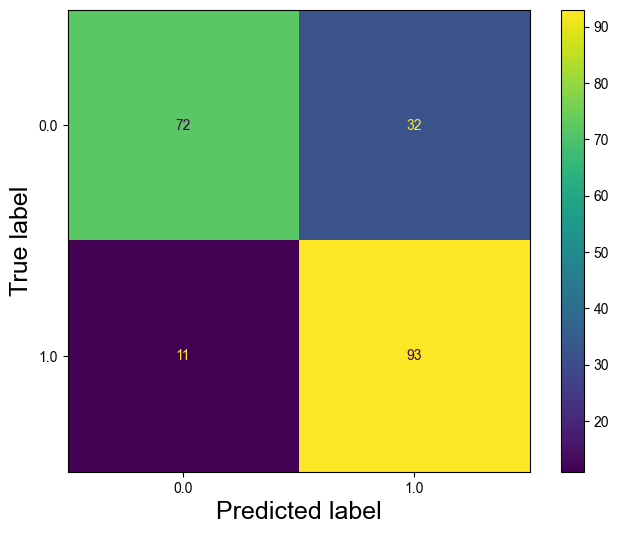

0.7932692307692307


c:\Users\aaris\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


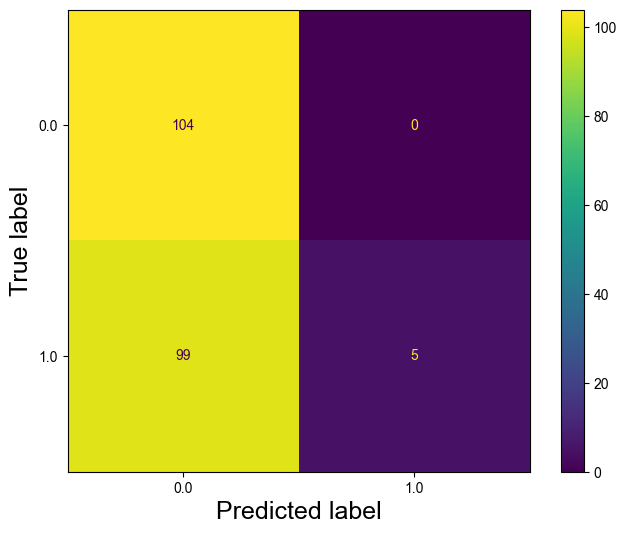

0.5240384615384616


In [133]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

# Build LDA and QDA
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()

# Fit the model
LDA.fit(xtrain, ytrain)
QDA.fit(xtrain, ytrain)

# Confusion matrix of LDA
plot_confusion_matrix(LDA, xtest, ytest)
plt.show()
print(accuracy_score(LDA.predict(xtest), ytest))

# Confusion matrix of QDA
plot_confusion_matrix(QDA, xtest, ytest)
plt.show()
print(accuracy_score(QDA.predict(xtest), ytest))

c:\Users\aaris\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aaris\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


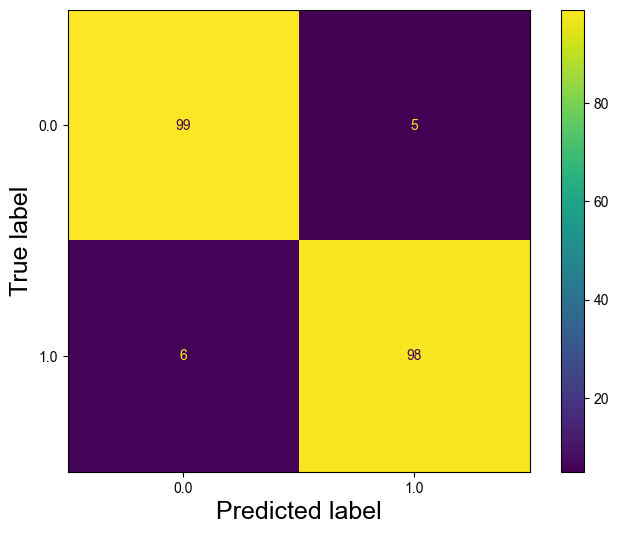

0.9471153846153846


In [183]:
from sklearn.svm import SVC

SVM = SVC(kernel="rbf") # Modified the kernel to see the difference

SVM.fit(xtrain, ytrain)

plot_confusion_matrix(SVM, xtest, ytest)
plt.show()
print(accuracy_score(SVM.predict(xtest), ytest))

c:\Users\aaris\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\aaris\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


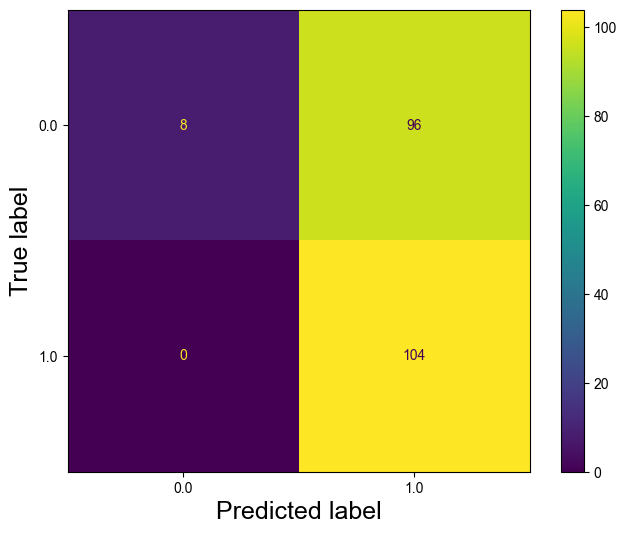

0.5384615384615384


In [135]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5) # Modified the K to see the difference

KNN.fit(xtrain, ytrain)

plot_confusion_matrix(KNN, xtest, ytest)
plt.show()
print(accuracy_score(KNN.predict(xtest), ytest))
